In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
sample_20 = pd.read_csv('../data/comments_20_df.csv')


In [56]:
sample_20.shape

(31911, 22)

In [57]:
sample_20.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,neutral,comment_text,cleaner_text,compound,...,pos,word count,character count,special characters,capitalized letters,swear words,misogynist words,racial_ethnic slurs,lgbtq hate,lemmatized_text
0,0,0,0,0,0,0,1,"""\n\n=The authority of the user Node_ue in the...",""" =The authority of the user Node_ue in the m...",-0.7017,...,0.147,585,3425,186,216,2,0,0,4,`` =The authority user Node_ue matter language...
1,0,0,0,0,0,0,1,"Hello Carol. I am distressed by your remarks, ...","Hello Carol. I am distressed by your remarks, ...",-0.1280,...,0.056,42,236,6,7,1,0,0,0,"Hello Carol . distressed remark , consider unc..."
2,0,0,0,0,0,0,1,"""\nI'm noting here just for the record that c...",""" I'm noting here just for the record that cr...",0.6124,...,0.312,15,80,4,1,0,0,0,0,`` 'm noting record creation protected page . ...
3,0,0,0,0,0,0,1,"""\nOK, thanks. gabsadds """,""" OK, thanks. gabsadds """,0.7034,...,0.854,5,24,4,2,0,0,0,0,"`` OK , thanks . gabsadds ``"
4,0,0,0,0,0,0,1,that Feba warned me to stop the edits on those...,that Feba warned me to stop the edits on those...,-0.9529,...,0.051,136,728,26,65,0,0,0,0,Feba warned stop edits talk page 02:24 9 June ...


Make dataset to separate toxic text to augment

In [58]:
sample_20['binary_tox'] = sample_20['neutral'].map(lambda x: 1 if x == 0 else 0)

In [59]:
sample_20['binary_tox'].value_counts()

0    28666
1     3245
Name: binary_tox, dtype: int64

In [60]:
value_counts_before = sample_20['binary_tox'].value_counts(normalize = True)

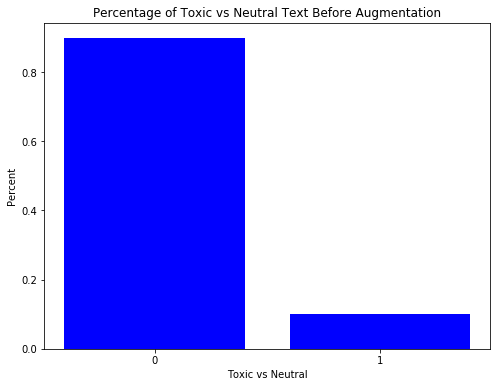

<Figure size 432x288 with 0 Axes>

In [101]:
# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(value_counts_before.index, value_counts_before.values, color='blue')
plt.xlabel('Toxic vs Neutral')
plt.ylabel('Percent')
plt.title('Percentage of Toxic vs Neutral Text Before Augmentation')
plt.xticks(value_counts_before.index)  # Set x-axis labels
plt.show()

plt.savefig("before_toxvsneu.png", dpi=300, bbox_inches="tight")

In [65]:
# sample_20

In [66]:
tox_20 = sample_20[sample_20['binary_tox'] == 1]
tox_20.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,neutral,comment_text,cleaner_text,compound,...,word count,character count,special characters,capitalized letters,swear words,misogynist words,racial_ethnic slurs,lgbtq hate,lemmatized_text,binary_tox
10,1,0,0,0,0,0,0,yo \n\ndavis v machida is full of shit. \n\nim...,yo davis v machida is full of shit. im cha...,-0.7124,...,23,130,3,0,1,0,0,0,yo davis v machida shit . im changing . wikipe...,1
11,1,0,0,0,1,0,0,You are a faggot!68.33.41.181,You are a faggot!68.33.41.181,0.0000,...,4,29,4,1,0,0,0,2,faggot ! 68.33.41.181,1
22,1,0,1,0,1,0,0,"""\n\n UNBLOCK ME YOU ASSHOES! \n\n{{unblock|HA...",""" UNBLOCK ME YOU ASSHOES! {{unblock|HAHAHA...",0.9965,...,862,4672,269,171,5,0,0,0,`` UNBLOCK ASSHOES ! { { unblock|HAHAHAHA ! ! ...,1
25,1,0,1,0,1,0,0,Gorlitz! - Stop screwing with me on the Amy ...,Gorlitz! - Stop screwing with me on the Amy ...,-0.8513,...,26,135,6,13,1,0,0,0,Gorlitz ! - Stop screwing Amy G. frigging Nazi...,1
41,1,0,0,0,1,0,0,ralfx is yag. He is the yaggest mothering chin...,ralfx is yag. He is the yaggest mothering chin...,0.0000,...,13,68,2,1,0,0,1,0,ralfx yag . yaggest mothering chinkie dude wor...,1


In [67]:
neu_20 = sample_20[sample_20['binary_tox'] == 0]

neu_20.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,neutral,comment_text,cleaner_text,compound,...,word count,character count,special characters,capitalized letters,swear words,misogynist words,racial_ethnic slurs,lgbtq hate,lemmatized_text,binary_tox
0,0,0,0,0,0,0,1,"""\n\n=The authority of the user Node_ue in the...",""" =The authority of the user Node_ue in the m...",-0.7017,...,585,3425,186,216,2,0,0,4,`` =The authority user Node_ue matter language...,0
1,0,0,0,0,0,0,1,"Hello Carol. I am distressed by your remarks, ...","Hello Carol. I am distressed by your remarks, ...",-0.1280,...,42,236,6,7,1,0,0,0,"Hello Carol . distressed remark , consider unc...",0
2,0,0,0,0,0,0,1,"""\nI'm noting here just for the record that c...",""" I'm noting here just for the record that cr...",0.6124,...,15,80,4,1,0,0,0,0,`` 'm noting record creation protected page . ...,0
3,0,0,0,0,0,0,1,"""\nOK, thanks. gabsadds """,""" OK, thanks. gabsadds """,0.7034,...,5,24,4,2,0,0,0,0,"`` OK , thanks . gabsadds ``",0
4,0,0,0,0,0,0,1,that Feba warned me to stop the edits on those...,that Feba warned me to stop the edits on those...,-0.9529,...,136,728,26,65,0,0,0,0,Feba warned stop edits talk page 02:24 9 June ...,0


In [68]:
#save data

neu_20.to_csv('neu_20.csv', index = False)

In [69]:
## funtion to replace text with synonyms

import nltk
from nltk.corpus import wordnet
import random

# Initialize NLTK
nltk.download('punkt')
nltk.download('wordnet')

# Function to replace words with synonyms
def replace_with_synonyms(text):
    
    #tokenizes text
    words = nltk.word_tokenize(text)
    replaced_words = []

    #loops through words
    for word in words:
        synonyms = []
        
        #taking the lemma of the synonyms of the words
        for syn in wordnet.synsets(word):
            for lemma in syn.lemmas():
                synonyms.append(lemma.name())
        
        #if there is a synonym for the word, it will replace with it
        if synonyms:
            synonym = random.choice(synonyms)
            replaced_words.append(synonym)
        #otherwise just use the word
        else:
            replaced_words.append(word)
    
    #join text back together
    replaced_text = ' '.join(replaced_words)
    
    return replaced_text

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/heatherrobbins/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/heatherrobbins/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [70]:
tox_20['lemmatized_text'].head()

10    yo davis v machida shit . im changing . wikipe...
11                                faggot ! 68.33.41.181
22    `` UNBLOCK ASSHOES ! { { unblock|HAHAHAHA ! ! ...
25    Gorlitz ! - Stop screwing Amy G. frigging Nazi...
41    ralfx yag . yaggest mothering chinkie dude wor...
Name: lemmatized_text, dtype: object

In [71]:
# Apply text augmentation to the 'lemmatized text' column
tox_20['augmented_text'] = tox_20['lemmatized_text'].apply(replace_with_synonyms)

/Users/heatherrobbins/env3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [72]:
tox_20.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,neutral,comment_text,cleaner_text,compound,...,character count,special characters,capitalized letters,swear words,misogynist words,racial_ethnic slurs,lgbtq hate,lemmatized_text,binary_tox,augmented_text
10,1,0,0,0,0,0,0,yo \n\ndavis v machida is full of shit. \n\nim...,yo davis v machida is full of shit. im cha...,-0.7124,...,130,3,0,1,0,0,0,yo davis v machida shit . im changing . wikipe...,1,yo Jefferson_Davis V machida shit . im change ...
11,1,0,0,0,1,0,0,You are a faggot!68.33.41.181,You are a faggot!68.33.41.181,0.0000,...,29,4,1,0,0,0,2,faggot ! 68.33.41.181,1,queer ! 68.33.41.181
22,1,0,1,0,1,0,0,"""\n\n UNBLOCK ME YOU ASSHOES! \n\n{{unblock|HA...",""" UNBLOCK ME YOU ASSHOES! {{unblock|HAHAHA...",0.9965,...,4672,269,171,5,0,0,0,`` UNBLOCK ASSHOES ! { { unblock|HAHAHAHA ! ! ...,1,`` free ASSHOES ! { { unblock|HAHAHAHA ! ! ! f...
25,1,0,1,0,1,0,0,Gorlitz! - Stop screwing with me on the Amy ...,Gorlitz! - Stop screwing with me on the Amy ...,-0.8513,...,135,6,13,1,0,0,0,Gorlitz ! - Stop screwing Amy G. frigging Nazi...,1,Gorlitz ! - break_off make_out Amy G. frigging...
41,1,0,0,0,1,0,0,ralfx is yag. He is the yaggest mothering chin...,ralfx is yag. He is the yaggest mothering chin...,0.0000,...,68,2,1,0,0,1,0,ralfx yag . yaggest mothering chinkie dude wor...,1,ralfx yag . yaggest engender chinkie fellow hu...


In [73]:
#do this multiple times to get different variations and increase tox sample size

tox_20['augmented_text_2'] = tox_20['lemmatized_text'].apply(replace_with_synonyms)

/Users/heatherrobbins/env3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
tox_20['augmented_text_2'].head()

10    yo Davis atomic_number_23 machida horseshit . ...
11                                 fairy ! 68.33.41.181
22    `` unblock ASSHOES ! { { unblock|HAHAHAHA ! ! ...
25    Gorlitz ! - give_up have_it_away Amy G. friggi...
41    ralfx yag . yaggest generate chinkie gallant c...
Name: augmented_text_2, dtype: object

In [75]:
tox_20['augmented_text_3'] = tox_20['lemmatized_text'].apply(replace_with_synonyms)

/Users/heatherrobbins/env3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
tox_20.head(10)

,toxic,severe_toxic,obscene,threat,insult,identity_hate,neutral,comment_text,cleaner_text,compound,...,capitalized letters,swear words,misogynist words,racial_ethnic slurs,lgbtq hate,lemmatized_text,binary_tox,augmented_text,augmented_text_2,augmented_text_3
10,1,0,0,0,0,0,0,yo \n\ndavis v machida is full of shit. \n\nim...,yo davis v machida is full of shit. im cha...,-0.7124,...,0,1,0,0,0,yo davis v machida shit . im changing . wikipe...,1,yo Jefferson_Davis V machida shit . im change ...,yo Davis atomic_number_23 machida horseshit . ...,yo Bette_Davis V machida shit . im change . wi...
11,1,0,0,0,1,0,0,You are a faggot!68.33.41.181,You are a faggot!68.33.41.181,0.0000,...,1,0,0,0,2,faggot ! 68.33.41.181,1,queer ! 68.33.41.181,fairy ! 68.33.41.181,poof ! 68.33.41.181
22,1,0,1,0,1,0,0,"""\n\n UNBLOCK ME YOU ASSHOES! \n\n{{unblock|HA...",""" UNBLOCK ME YOU ASSHOES! {{unblock|HAHAHA...",0.9965,...,171,5,0,0,0,`` UNBLOCK ASSHOES ! { { unblock|HAHAHAHA ! ! ...,1,`` free ASSHOES ! { { unblock|HAHAHAHA ! ! ! f...,`` unblock ASSHOES ! { { unblock|HAHAHAHA ! ! ...,`` unblock ASSHOES ! { { unblock|HAHAHAHA ! ! ...
25,1,0,1,0,1,0,0,Gorlitz! - Stop screwing with me on the Amy ...,Gorlitz! - Stop screwing with me on the Amy ...,-0.8513,...,13,1,0,0,0,Gorlitz ! - Stop screwing Amy G. frigging Nazi...,1,Gorlitz ! - break_off make_out Amy G. frigging...,Gorlitz ! - give_up have_it_away Amy G. friggi...,Gorlitz ! - occlusive screw Amy G. frigging Na...
41,1,0,0,0,1,0,0,ralfx is yag. He is the yaggest mothering chin...,ralfx is yag. He is the yaggest mothering chin...,0.0000,...,1,0,0,1,0,ralfx yag . yaggest mothering chinkie dude wor...,1,ralfx yag . yaggest engender chinkie fellow hu...,ralfx yag . yaggest generate chinkie gallant c...,ralfx yag . yaggest overprotect chinkie fellow...
48,1,1,1,0,1,0,0,""" \n\n""""""""WHAT THE FUCK?!?!?!""""""""\nThe article...",""" """"""""WHAT THE FUCK?!?!?!"""""""" The article wa...",0.4990,...,13,4,0,0,0,`` `` '' '' '' FUCK ? ! ? ! ? ! '' '' '' '' ar...,1,`` `` `` `` `` bang ? ! ? ! ? ! `` '' `` `` ar...,`` `` `` `` `` sleep_together ? ! ? ! ? ! `` '...,`` `` `` `` `` fucking ? ! ? ! ? ! `` '' `` ``...
49,1,0,0,0,0,0,0,STOP! \n\nI said stop leaving commentston my t...,STOP! I said stop leaving commentston my tal...,-0.8021,...,9,0,0,0,0,STOP ! said stop leaving commentston talk page...,1,stoppage ! say blockade leave commentston utte...,bar ! suppose block_off entrust commentston pe...,full_stop ! say arrest going_away commentston ...
61,1,0,1,0,1,0,0,"No wonder he hates cops, they probably kick hi...","No wonder he hates cops, they probably kick hi...",-0.8225,...,1,1,0,0,0,"wonder hate cop , probably kick as time .",1,"wonder hate pick_up , believably quetch Americ...","wonder detest hook , in_all_probability kick a...","wonder hatred bull , belike beef vitamin_A time ."
80,1,0,1,0,1,0,0,and for the flamming your flamming and your go...,and for the flamming your flamming and your go...,-0.4118,...,3,0,0,0,0,"flamming flamming going block crap , counting ...",1,flamming flamming locomote block_off defecate ...,"flamming flamming release block stool , weigh ...","flamming flamming proceed block shit , countin..."
89,1,0,0,0,1,0,0,you sound an utterly nasty bully you are not a...,you sound an utterly nasty bully you are not a...,-0.9444,...,0,0,0,0,0,sound utterly nasty bully cat petty hitler sim...,1,sound utterly awful swagger computerized_axial...,speech_sound dead nasty bully vomit_up petty_l...,sound dead nasty browbeat bozo subaltern Hitle...


In [77]:
#save data
tox_20.to_csv('synonym_augmented_tox20.csv', index = False)

Combine augmented data to increase toxicity sample size

In [78]:
tox_1 = tox_20.drop(columns = ['augmented_text', 'augmented_text_2', 'augmented_text_3'])
tox_2 = tox_20.drop(columns = ['lemmatized_text', 'augmented_text_2', 'augmented_text_3'])
tox_3 = tox_20.drop(columns = ['lemmatized_text', 'augmented_text', 'augmented_text_3'])
tox_4 = tox_20.drop(columns = ['lemmatized_text', 'augmented_text', 'augmented_text_2'])

In [79]:
tox_4.head(1)

,toxic,severe_toxic,obscene,threat,insult,identity_hate,neutral,comment_text,cleaner_text,compound,...,word count,character count,special characters,capitalized letters,swear words,misogynist words,racial_ethnic slurs,lgbtq hate,binary_tox,augmented_text_3
10,1,0,0,0,0,0,0,yo \n\ndavis v machida is full of shit. \n\nim...,yo davis v machida is full of shit. im cha...,-0.7124,...,23,130,3,0,1,0,0,0,1,yo Bette_Davis V machida shit . im change . wi...


In [80]:
# Rename a specific column

tox_2.rename(columns={'augmented_text': 'lemmatized_text'}, inplace=True)
tox_3.rename(columns={'augmented_text_2': 'lemmatized_text'}, inplace=True)
tox_4.rename(columns={'augmented_text_3': 'lemmatized_text'}, inplace=True)

In [81]:
tox_4.head(1)

,toxic,severe_toxic,obscene,threat,insult,identity_hate,neutral,comment_text,cleaner_text,compound,...,word count,character count,special characters,capitalized letters,swear words,misogynist words,racial_ethnic slurs,lgbtq hate,binary_tox,lemmatized_text
10,1,0,0,0,0,0,0,yo \n\ndavis v machida is full of shit. \n\nim...,yo davis v machida is full of shit. im cha...,-0.7124,...,23,130,3,0,1,0,0,0,1,yo Bette_Davis V machida shit . im change . wi...


In [82]:
# List of DataFrames to concatenate
dfs = [tox_1, tox_2, tox_3, tox_4]

# Concatenate DataFrames row-wise based on the 'ID' column
combined_tox_df = pd.concat(dfs, ignore_index=True)

/Users/heatherrobbins/env3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [83]:
combined_tox_df.shape

(12980, 23)

In [84]:
combined_tox_df.head()

,binary_tox,capitalized letters,character count,cleaner_text,comment_text,compound,identity_hate,insult,lemmatized_text,lgbtq hate,...,neutral,obscene,pos,racial_ethnic slurs,severe_toxic,special characters,swear words,threat,toxic,word count
0,1,0,130,yo davis v machida is full of shit. im cha...,yo \n\ndavis v machida is full of shit. \n\nim...,-0.7124,0,0,yo davis v machida shit . im changing . wikipe...,0,...,0,0,0.000,0,0,3,1,0,1,23
1,1,1,29,You are a faggot!68.33.41.181,You are a faggot!68.33.41.181,0.0000,0,1,faggot ! 68.33.41.181,2,...,0,0,0.000,0,0,4,0,0,1,4
2,1,171,4672,""" UNBLOCK ME YOU ASSHOES! {{unblock|HAHAHA...","""\n\n UNBLOCK ME YOU ASSHOES! \n\n{{unblock|HA...",0.9965,0,1,`` UNBLOCK ASSHOES ! { { unblock|HAHAHAHA ! ! ...,0,...,0,1,0.147,0,0,269,5,0,1,862
3,1,13,135,Gorlitz! - Stop screwing with me on the Amy ...,Gorlitz! - Stop screwing with me on the Amy ...,-0.8513,0,1,Gorlitz ! - Stop screwing Amy G. frigging Nazi...,0,...,0,1,0.000,0,0,6,1,0,1,26
4,1,1,68,ralfx is yag. He is the yaggest mothering chin...,ralfx is yag. He is the yaggest mothering chin...,0.0000,0,1,ralfx yag . yaggest mothering chinkie dude wor...,0,...,0,0,0.000,1,0,2,0,0,1,13


In [85]:
#save new augmented toxic data
combined_tox_df.to_csv('aug_tox_20.csv', index = False)

In [86]:
aug_tox_20 = pd.read_csv('aug_tox_20.csv')

In [87]:
aug_tox_20.head()

,binary_tox,capitalized letters,character count,cleaner_text,comment_text,compound,identity_hate,insult,lemmatized_text,lgbtq hate,...,neutral,obscene,pos,racial_ethnic slurs,severe_toxic,special characters,swear words,threat,toxic,word count
0,1,0,130,yo davis v machida is full of shit. im cha...,yo \n\ndavis v machida is full of shit. \n\nim...,-0.7124,0,0,yo davis v machida shit . im changing . wikipe...,0,...,0,0,0.000,0,0,3,1,0,1,23
1,1,1,29,You are a faggot!68.33.41.181,You are a faggot!68.33.41.181,0.0000,0,1,faggot ! 68.33.41.181,2,...,0,0,0.000,0,0,4,0,0,1,4
2,1,171,4672,""" UNBLOCK ME YOU ASSHOES! {{unblock|HAHAHA...","""\n\n UNBLOCK ME YOU ASSHOES! \n\n{{unblock|HA...",0.9965,0,1,`` UNBLOCK ASSHOES ! { { unblock|HAHAHAHA ! ! ...,0,...,0,1,0.147,0,0,269,5,0,1,862
3,1,13,135,Gorlitz! - Stop screwing with me on the Amy ...,Gorlitz! - Stop screwing with me on the Amy ...,-0.8513,0,1,Gorlitz ! - Stop screwing Amy G. frigging Nazi...,0,...,0,1,0.000,0,0,6,1,0,1,26
4,1,1,68,ralfx is yag. He is the yaggest mothering chin...,ralfx is yag. He is the yaggest mothering chin...,0.0000,0,1,ralfx yag . yaggest mothering chinkie dude wor...,0,...,0,0,0.000,1,0,2,0,0,1,13


In [88]:
aug_tox_20['binary_tox'].value_counts()

1    12980
Name: binary_tox, dtype: int64

In [89]:
neu_20['binary_tox'].value_counts()

0    28666
Name: binary_tox, dtype: int64

combine and shuffle tox20 and neu20 for 20% dataset with tox augmentation

In [90]:
# Combine DataFrames
combined_df = pd.concat([aug_tox_20, neu_20], ignore_index=True)

# Shuffle indexes using sample()
df_20 = combined_df.sample(frac=1).reset_index(drop=True)

/Users/heatherrobbins/env3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [91]:
df_20['binary_tox'].value_counts()

0    28666
1    12980
Name: binary_tox, dtype: int64

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
## create 5% holdoutset for final sequenced model, and leave 15% for training and testing binary and multilabel models

df_15, df_5 = train_test_split(df_20, test_size=0.05, stratify=df_20['binary_tox'])

In [96]:
value_counts = df_15['binary_tox'].value_counts(normalize = True)

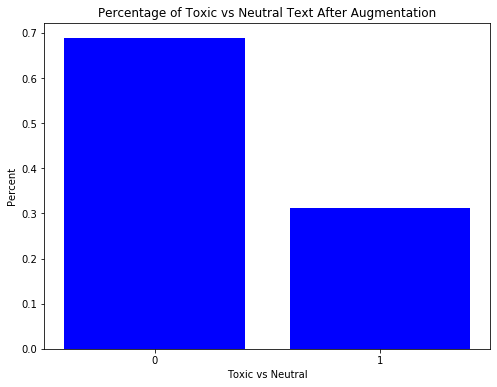

<Figure size 432x288 with 0 Axes>

In [102]:
# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(value_counts.index, value_counts.values, color='blue')
plt.xlabel('Toxic vs Neutral')
plt.ylabel('Percent')
plt.title('Percentage of Toxic vs Neutral Text After Augmentation')
plt.xticks(value_counts.index)  # Set x-axis labels
plt.show()

plt.savefig("aug_toxvsneu.png", dpi=300, bbox_inches="tight")

In [45]:
df_15.to_csv('df_15.csv', index = False)

In [44]:
df_5['binary_tox'].value_counts()

0    1434
1     649
Name: binary_tox, dtype: int64

In [46]:
df_5.to_csv('df_5.csv', index = False)